## DFT (Discrete Fourier Transformation) Algorithm

Let $(\{x_n\})$ be a sequence defined as

$(x_0, x_1, \ldots, x_{N-1})$.

This sequence can be transformed into another sequence of complex numbers, $(\{X_k\})$, defined as

$(X_0, X_1, \ldots, X_{N-1})$,

using the Discrete Fourier Transform (DFT) which is given by:

$[
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i2\pi \frac{kn}{N}} \quad \text{(Eq.1)}
]$

The transform is sometimes denoted by the symbol $(\mathcal{F})$, as in $(X = \mathcal{F}\{{x}\})$ or $(F(x))$ or $(F_x)$.

The inverse transform is given by:

$[
x_k = (1/N)\sum_{n=0}^{N-1} X_n \cdot e^{i2\pi \frac{kn}{N}} \quad \text{(Eq.1)}
]$

x=  [ 1.+0.j  2.-1.j -0.-1.j -1.+2.j]
FT_X =  [ 2.+0.j -2.-2.j  0.-2.j  4.+4.j]
IDFT_X=  [ 1.+0.j  2.-1.j  0.-1.j -1.+2.j]


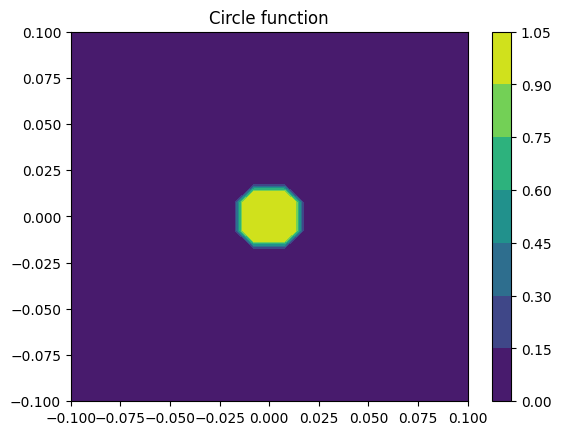

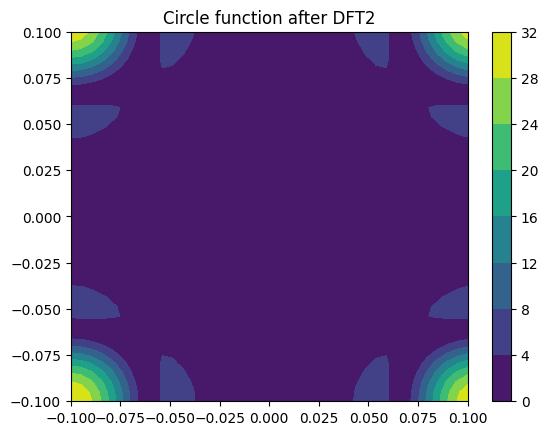

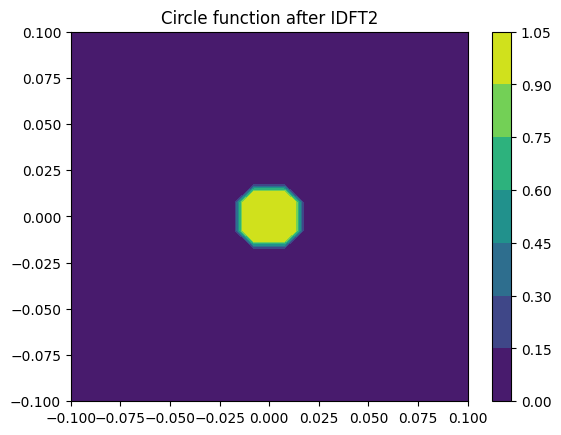

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# DFT algorithm

x = np.array([1, 2 - 1j , -1j , -1 + 2j])

def dft(x):
    x = np.asarray(x)
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

print("x= ",x)
FT_X = dft(x=x)
print("FT_X = ",np.round(FT_X))

# IDFT algorithm

def idft(x):
    N = len(x)
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)
    return np.dot(M, x)/N

IDFT_X = idft(x=FT_X)
print("IDFT_X= ",np.round(IDFT_X))

# 2D DFT (namely DFT2)
def dft2(X):
    N,M = np.shape(X)
    Y = np.zeros(np.shape(X), dtype=complex)

    for p in range(0,N):
      for q in range(0,M):
        sum = 0 + 0j
        for k in range(0,M):
          for l in range(0,N):
            tobesummed = X[k][l] * np.exp(-1j*2*np.pi*k*p/M) * np.exp(-1j*2*np.pi*l*q/N)
            sum += tobesummed
        Y[p][q] = sum

    return Y

# 2D IDFT (namely DFT2)
def idft2(X):
  N,M = np.shape(X)
  Y = np.zeros(np.shape(X), dtype=complex)
  for p in range(0,N):
    for q in range(0,M):
      sum = 0 + 0j
      for k in range(0,M):
        for l in range(0,N):
          tobesummed = X[k][l] * np.exp(1j*2*np.pi*k*p/M) * np.exp(1j*2*np.pi*l*q/N) / (M*N)
          sum += tobesummed
      Y[p][q] = sum

  return Y
# Example For DFT2:

def circ(r):
    return lambda x, y: np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)

r = 0.015
L = 0.2
M = 40

# Visualization of the 1D functions
x = np.linspace(-L/2, L/2, M)
y = x
X, Y = np.meshgrid(x, y)
r = 0.015
circ_plot = circ(r)(X, Y)

plt.contourf(X, Y, circ_plot)
plt.title("Circle function")
plt.colorbar()
plt.show()

alpha = 1
FT2 = dft2(circ_plot)
plt.contourf(X, Y, np.abs((dft2(circ_plot)))**alpha)
plt.title("Circle function after DFT2")
plt.colorbar()
plt.show()


IFT2 = idft2(FT2)
plt.contourf(X, Y, np.abs(IFT2)**alpha)
plt.title("Circle function after IDFT2")
plt.colorbar()
plt.show()


## FFT (Fast Fourier Transformation) Algorithm
Radix-2 Cooley-Tukey

from: https://jbrd.github.io/2017/11/21/implementing-the-radix-2-cooley-tukey-fft.html

In [2]:

x = np.array([1, 2 - 1j , -1j , -1 + 2j])
# bit reverse order

import numpy as np

def bit_reversal(values_real, values_imag, n):
    values_real.setflags(write=True)
    values_imag.setflags(write=True)
    # Implement bit reversal for array elements
    j = 0
    for i in range(1, n):
        bit = n >> 1
        while j >= bit:
            j -= bit
            bit >>= 1
        j += bit
        if i < j:
            values_real[i], values_real[j] = values_real[j], values_real[i]
            values_imag[i], values_imag[j] = values_imag[j], values_imag[i]

def fft(values_real, values_imag, maxN):
    n = len(values_real)
    bit_reversal(values_real, values_imag, n)

    previousN = 1
    while previousN < maxN:
        wRE = 1.0
        wIM = 0.0

        # Compute alpha and beta for trigonometric recurrences
        alpha = np.sin(-np.pi / (previousN << 1))
        alpha *= alpha * 2.0
        beta = np.sin(-np.pi / previousN)

        for pairOffset in range(previousN):
            for groupOffset in range(0, maxN, previousN << 1):
                i = groupOffset + pairOffset
                j = i + previousN

                # Compute even and odd terms
                evenRE = values_real[i]
                evenIM = values_imag[i]
                oddRE = (wRE * values_real[j]) - (wIM * values_imag[j])
                oddIM = (wRE * values_imag[j]) + (wIM * values_real[j])

                # Compute new values
                values_real[i] = evenRE + oddRE
                values_imag[i] = evenIM + oddIM
                values_real[j] = evenRE - oddRE
                values_imag[j] = evenIM - oddIM

            # Update wRE and wIM using trigonometric recurrence
            wRENext = wRE - (alpha * wRE) - (beta * wIM)
            wIMNext = wIM + (beta * wRE) - (alpha * wIM)
            wRE = wRENext
            wIM = wIMNext

        previousN <<= 1

# Example usage
values_real = x.real
values_imag = x.imag
fft(values_real, values_imag, maxN=4)
FT = list(map(complex, np.round(values_real), np.round(values_imag)))
print(FT)


[(2+0j), (-2-2j), -2j, (4+4j)]
